# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [174]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "left")

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Checking the number of mice.
df["Mouse ID"].nunique()

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_ids = [df[["Mouse ID", "Timepoint"]].value_counts().index[i][0] for i in range(len(df[["Mouse ID", "Timepoint"]].value_counts())) if df[["Mouse ID", "Timepoint"]].value_counts()[i] > 1]
dupe_ids = dupe_ids[0]

In [7]:
# Optional: Get all the data for the duplicate mouse ID.            
df.loc[df["Mouse ID"] == dupe_ids]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df.loc[df["Mouse ID"] != dupe_ids]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
df_mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
df_median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
df_var = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
df_std = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
df_sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
#df_mean = clean_df.groupby("Drug Regimen").mean()
df_stats = pd.concat([df_mean,
                      df_median,
                      df_var,
                      df_std,
                      df_sem],
                      axis = 1)
df_stats.columns = ["Mean", "Median", "Variance", "Std", "SEM"]
df_stats

,Mean,Median,Variance,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
stats = ['mean', 
              'median', 
              st.variation,
              'std',
              st.sem
]
# Using the aggregation method, produce the same summary statistics in a single line
df_stats = df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(func=stats)
df_stats.columns = ["Mean", "Median", "Variance", "Std", "SEM"]
df_stats

,Mean,Median,Variance,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,0.122528,4.994774,0.329346
Ceftamin,52.591172,51.776157,0.118852,6.268188,0.469821
Infubinol,52.884795,51.820584,0.123831,6.567243,0.492236
Ketapril,55.235638,53.698743,0.149499,8.279709,0.603860
Naftisol,54.331565,52.509285,0.149320,8.134708,0.596466
Placebo,54.033581,52.288934,0.144343,7.821003,0.581331
Propriva,52.322552,50.854632,0.123991,6.507770,0.512884
Ramicane,40.216745,40.673236,0.120240,4.846308,0.320955
Stelasyn,54.233149,52.431737,0.141778,7.710419,0.573111


## Bar and Pie Charts

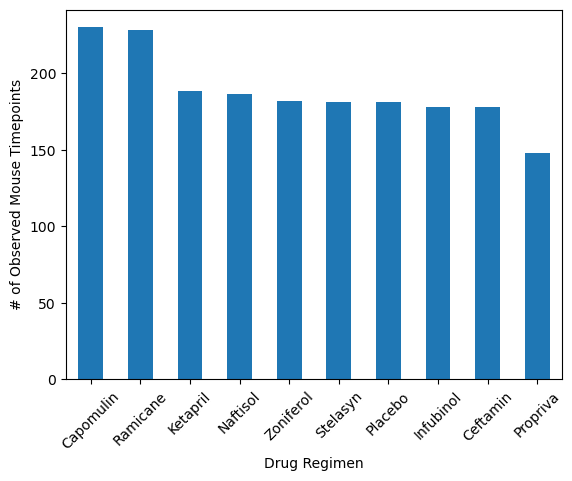

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
ax = clean_df["Drug Regimen"].value_counts().plot(kind = "bar", 
                                                  xlabel = "Drug Regimen", 
                                                  ylabel = "# of Observed Mouse Timepoints",
                                                  rot = 45)

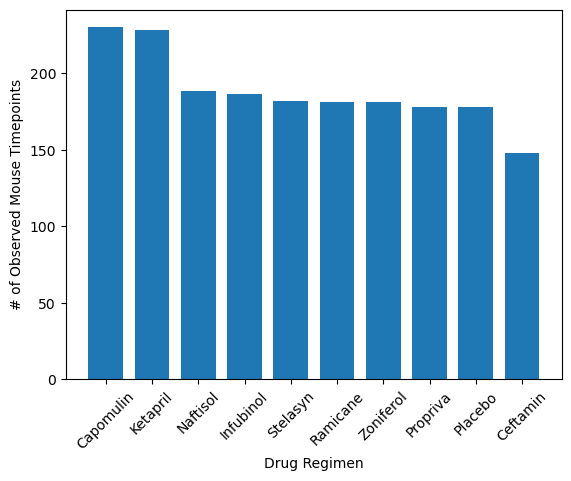

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(clean_df["Drug Regimen"].unique(), 
        clean_df["Drug Regimen"].value_counts(),
        width = 0.75,
        align = "center"
       )

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = 45)
plt.show()

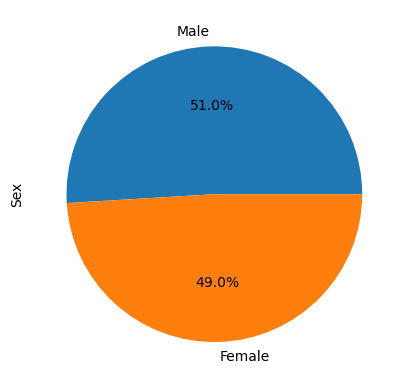

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
ax = clean_df["Sex"].value_counts().plot(kind = "pie",
                                         ylabel = "Sex",
                                         autopct = "%1.1f%%"
                                        )

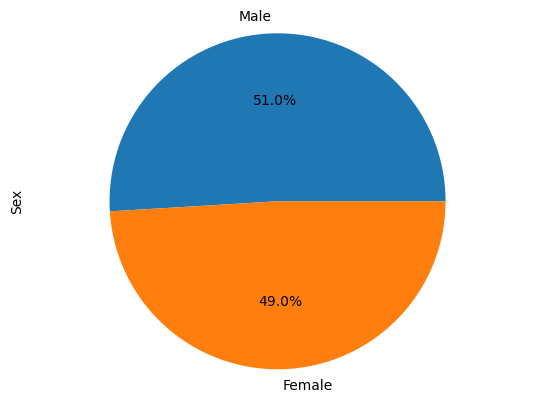

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]

sizes = [clean_df["Sex"].value_counts()[0], clean_df["Sex"].value_counts()[1]]

plt.pie(sizes,
        labels = labels,
        autopct = "%1.1f%%"
        )
plt.axis("equal")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [55]:
df_with_max_time = pd.merge(clean_df, max_time_df, left_on = ["Mouse ID", "Timepoint"], right_on = ["index","Max Time"])
df_with_max_time.to_excel("data/test.xlsx", "test")

In [68]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_times = {}
id_with_times = clean_df.groupby(["Mouse ID", "Timepoint"]).value_counts()

for i in range(len(id_with_times)):
    if id_with_times.index[i][0] not in max_times:
        max_times[id_with_times.index[i][0]] = id_with_times.index[i][1]
    elif max_times[id_with_times.index[i][0]] < id_with_times.index[i][1]:
        max_times[id_with_times.index[i][0]] = id_with_times.index[i][1]

max_time_df = pd.DataFrame.from_dict(max_times, orient='index', columns = ["Max Time"]).reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df_with_max_time = pd.merge(clean_df, max_time_df, left_on = ["Mouse ID", "Timepoint"], right_on = ["index","Max Time"])
df_with_max_time.sort_values("Drug Regimen").head(25)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),index,Max Time
214,j119,45,38.125164,1,Capomulin,Female,7,23,j119,45
143,r554,45,32.377357,3,Capomulin,Female,8,17,r554,45
176,v923,45,40.658124,2,Capomulin,Female,19,21,v923,45
126,l509,45,41.483008,3,Capomulin,Male,17,21,l509,45
98,j246,35,38.753265,1,Capomulin,Female,21,21,j246,35
146,g316,45,40.159220,2,Capomulin,Female,22,22,g316,45
209,s710,45,40.728578,1,Capomulin,Female,1,23,s710,45
124,t565,45,34.455298,0,Capomulin,Female,20,17,t565,45
39,w150,10,39.952347,0,Capomulin,Male,23,23,w150,10
204,s185,45,23.343598,1,Capomulin,Female,3,17,s185,45


In [123]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    volume = df_with_max_time[df_with_max_time["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volumes.append(volume)

    # Determine outliers using upper and lower bounds
    Q1 = float(volume.quantile([0.25]))
    Q3 = float(volume.quantile([0.75]))
    IQR = Q3 - Q1
    median = float(volume.quantile([0.5]))
    outliers = [x for x in volume if x > Q3 + IQR*1.5 or x < Q1 + IQR*-1.5]
    print(f"{treatment}'s IQR: {round(IQR,2)} \t {treatment}'s' Potential Outliers: {outliers}")

Capomulin's IQR: 7.78 	 Capomulin's' Potential Outliers: []
Ramicane's IQR: 9.1 	 Ramicane's' Potential Outliers: []
Infubinol's IQR: 11.48 	 Infubinol's' Potential Outliers: [36.3213458]
Ceftamin's IQR: 15.58 	 Ceftamin's' Potential Outliers: []


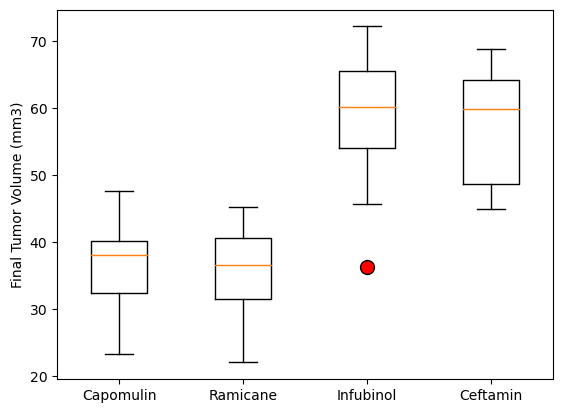

In [136]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_volumes, flierprops = dict(markerfacecolor = "r", markersize = 10))
plt.xticks([1, 2, 3, 4], treatments)
plt.show()


## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse l509')

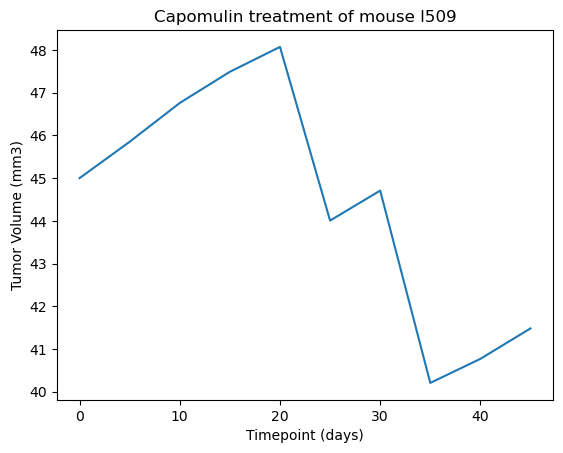

In [147]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin (I509)
data = clean_df[clean_df["Mouse ID"] == "l509"]
plt.plot(data["Timepoint"], data["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")

Text(0, 0.5, 'Average Tumor Volume (mm3)')

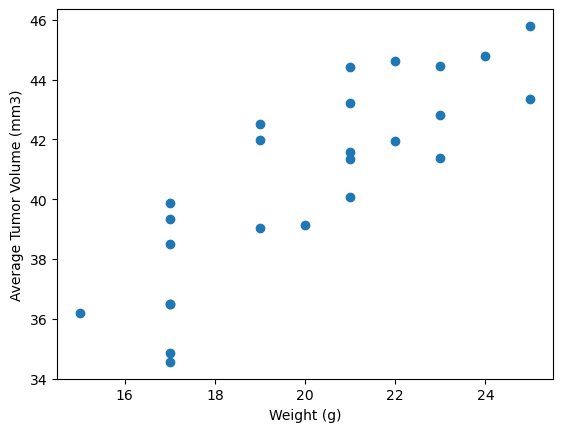

In [171]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
data = clean_df[clean_df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")
x = data["Weight (g)"].mean()
y = data["Tumor Volume (mm3)"].mean()
plt.scatter(x, y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

The correlation coefficient is 0.84194


Text(0, 0.5, 'Average Tumor Volume (mm3)')

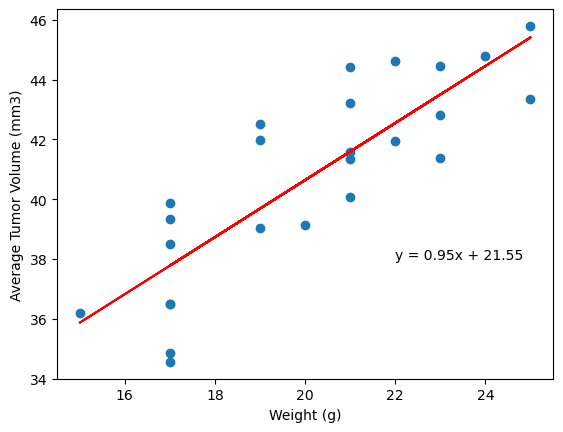

In [200]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The correlation coefficient is {round(rvalue,5)}")
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (22, 38),fontsize=10)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
